# Clustering (agrupamiento)

📌 Clustering se encuentra pertenece a los algoritmos de **aprendizaje no supervisado**. <br>
Su tares a dividir un conjunto de datos en grupos, los elementos del grupo deben ser más similares entre si, que con los otros grupos.

**Características**
- No tenemos mas información de los datos (no están etiquetados 🏷️).
- Su objetivo es descubrir patrones ocultos en los datos.


**Conceptos básicos**

- **Puntos de datos**: Elementos que queremos agrupar (e.g. Filas del dataset).
- **Features**: Características que describen cada punto de datos.
- **Similitud/Distancia**: Forma de medir cuán “*cerca*” o “*lejos*” están dos puntos de datos.
📏Métricas más comunes:
    - **Distancia Euclidiana**:  Más utilizada. Mide la distancia en linea recta que hay entre un punto y otro
        
        $
        \sqrt {(X_2 - x_1)^2 + (y_2 - y_1)^2}
        $
        
    - **Distancia Manhattan (City Block)**: Suma las diferencias absolutas de las coordenadas.
- **Centroide**: Centro del cluster. Promedio de todas las características de los puntos de datos pertenecientes al grupo (cluster).
- **Inercia**: Medida de que tan compactos son los clusters. 
➖ Un valor de inercia bajo  = Cluster más compacto y mejor agrupamiento.
- **Número de clusters**: Cantidad de grupos a formar.
- **Aleatoriedad**: Algunos algoritmos involucran pasos de aleatoriedad para inicializar los centroides.


**Casos de aplicación** 
1. No conocemos las etiquetas de nuestros datos.
2. Queremos descubrir patrones ocultos en los datos. 
3. Identificar datos atípicos: Detecta valores que se alejan de los puntos comunes en los datos.


Partiendo de la aplicación, tenemos **dos casos de uso**:
1. **Sabemos** cuantos grupos “k” queremos al final de nuestro resultado.
Algoritmos:
    1. `k-means` 
    2. `Spectral Clustering` 
2. Queremos que el algoritmo **descubra** la cantidad óptima  de grupos “k” según los datos que tenemos.
Algoritmos:
    1. `Meanshift` 
    2. `Clustering jerárquico` 
    3. `DBScan`

<br>

> Genera 🏷️ etiquetas para clasificar a los datos, teniendo en cuenta su parecido entre si (cluster).

## K-Means

**Características**

- **Basado en centroides**: Calcula y actualiza los centroides.
- **Necesita** `k`: Se le debe indicar cuantos grupos queremos (`k` número de grupos).
- **Iterativo**: Repite el proceso de asignación y actualización hasta tener clusters estables.
- **Sensible a inicialización**: Los centroides iniciales pueden afectar el resultado final.

**Funcionamiento**

1. **Elección de** `k`: Decidimos cuanto grupos queremos.
2. **Inicialización de centroides**: El algoritmo elige `k` puntos aleatorios como los primeros centroides.
3. **Asignación**: Cada punto de datos se asigna a su Centroide más cercano. 
4. **Repetir**: Se repiten los pasas 3 y 4 hasta que los centroides ya no se muevan

**Ventajas**
- **Simple y rápido**: Fácil de entender e implementar
- **Escalable**: Funciona bien con datasets grandes.
- **Genera clusters compactos**: Grupos con baja inercia.


**Desventajas**
- Require de un valor `k` predefinido.
- Sensible a outliers
- Sensible a la escala de las características.
- Asume clusters esféricos.


**Casos de uso más comunes**
- Segmentación de clientes
- Comprensión de imágenes
- Agrupación de documentos
- Análisis de datos genéticos

## Mean-Shift

📌 `Mean-Shift`, el buscador de densidades, calcula el número optimo de clusters que podemos encontrar en los datos, teniendo en cuenta como se distribuye la densidad de éstos.
<br>

⚠️ Este algoritmo funciona para una cantidad moderada de datos.

**Características**
- **Basado en densidad**: Busca las regiones con mayor densidad de puntos en el espacio de datos.
- **No necesita `k`**: Determina el número de clusters automáticamente.
- **Usa un kernel** (ventana de búsqueda): Define el tamaño del área donde buscará la densidad, se encuentra como el parámetro `bandwidth`.
- **Iterativo**: Cada punto se mueve gradualmente hacia la dirección con mayor densidad de puntos a su alrededor.

**Funcionamiento** 
1. **Elige un punto de inicio**: Toma un punto de datos como inicio.
2. **Define un bandwidth**: Tamaño de la región al rededor del punto de inicio.
3. **Calcula el Centroide**: Dentro del bandwidth, calcula el centroide de todos los puntes de datos que caen dentro de la región.
4. **Mueve el punto**: El punto de inicio se mueve hacia el centroide (shift = desplazamiento).
5. **Repite**: Los pasos 3 y 4 se repiten. El punto sigue en movimiento hacia la región de mayor densidad hasta que éste ya no pueda moverse
6. **Forma los clusters**: Todos los puntos al rededor del mimo pico de densidad se consideran parte del mismo cluster.

**Ventajas** 
- No requiere `k`
- Robusto a outliers

**Desventajas** 
- Sensible al `bandwidth` , un valor muy pequeño puede resultar en multiples clusters.
- Computacionalmente costoso
- Dificultades con clusters de densidades muy diferentes.

**Casos de uso** 
- **Segmentación de imágenes**: Agrupar pixels por colores o texturas similares.
- **Análisis de datos geoespaciales**: Identificar concentraciones en puntos de interés.
- **Análisis de patrones en datos de sensores**: Detección de áreas de alta actividad

## Implementación con Scikit-Learn

<div class="alert alert-info", role="alert">
    <h5>📢</h5>
    <p>
      Los ejemplos que se encuentrar a continuación, siguen en su mayoria, los pasos explicados por el profesor en el curso <a href="https://platzi.com/cursos/scikitlearn/"> Profesional de Machine Learning con scikit-learn </a>. 
    </p>
</div>

Librerías 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de clustering a implementar
from sklearn.cluster import MiniBatchKMeans, KMeans, MeanShift

In [2]:
%run 0.0-ml_professional-setup.ipynb

Carga del dataset _Candy_

In [3]:
file_path = path.data_raw_dir("candy-data.csv")
df = pd.read_csv(file_path)

df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


Quitamos las variables categóricas:

In [4]:
# Quitamos la variable categoríca 
X = df.drop(columns=["competitorname"], axis=1)

### Entrenamos el modelo K-Means con cuatro clusters

In [5]:
# Entrenamiento
kmeans = KMeans(n_clusters=4).fit(X)

# Verificamos el total de cluster creados
print(f"Cluster creados: {len(kmeans.cluster_centers_)}")

# Generamos las etiquetas -> como se etiqueraron los grupos
cluster_labels = kmeans.predict(X)
print(cluster_labels)

Cluster creados: 4
[0 0 1 3 2 3 2 1 1 1 1 1 1 3 1 3 1 3 2 1 2 3 2 2 2 2 1 2 0 3 1 2 0 0 3 2 0
 2 0 3 2 2 0 0 1 1 3 0 1 3 1 0 0 0 0 1 0 1 3 1 2 2 1 3 0 2 2 2 0 1 1 1 1 2
 3 3 3 3 3 0 3 1 3 3 3]


Inegramos las etiquetas al dataset original

In [6]:
df["cluster_labels"] = cluster_labels
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster_labels
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,1
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,3
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2


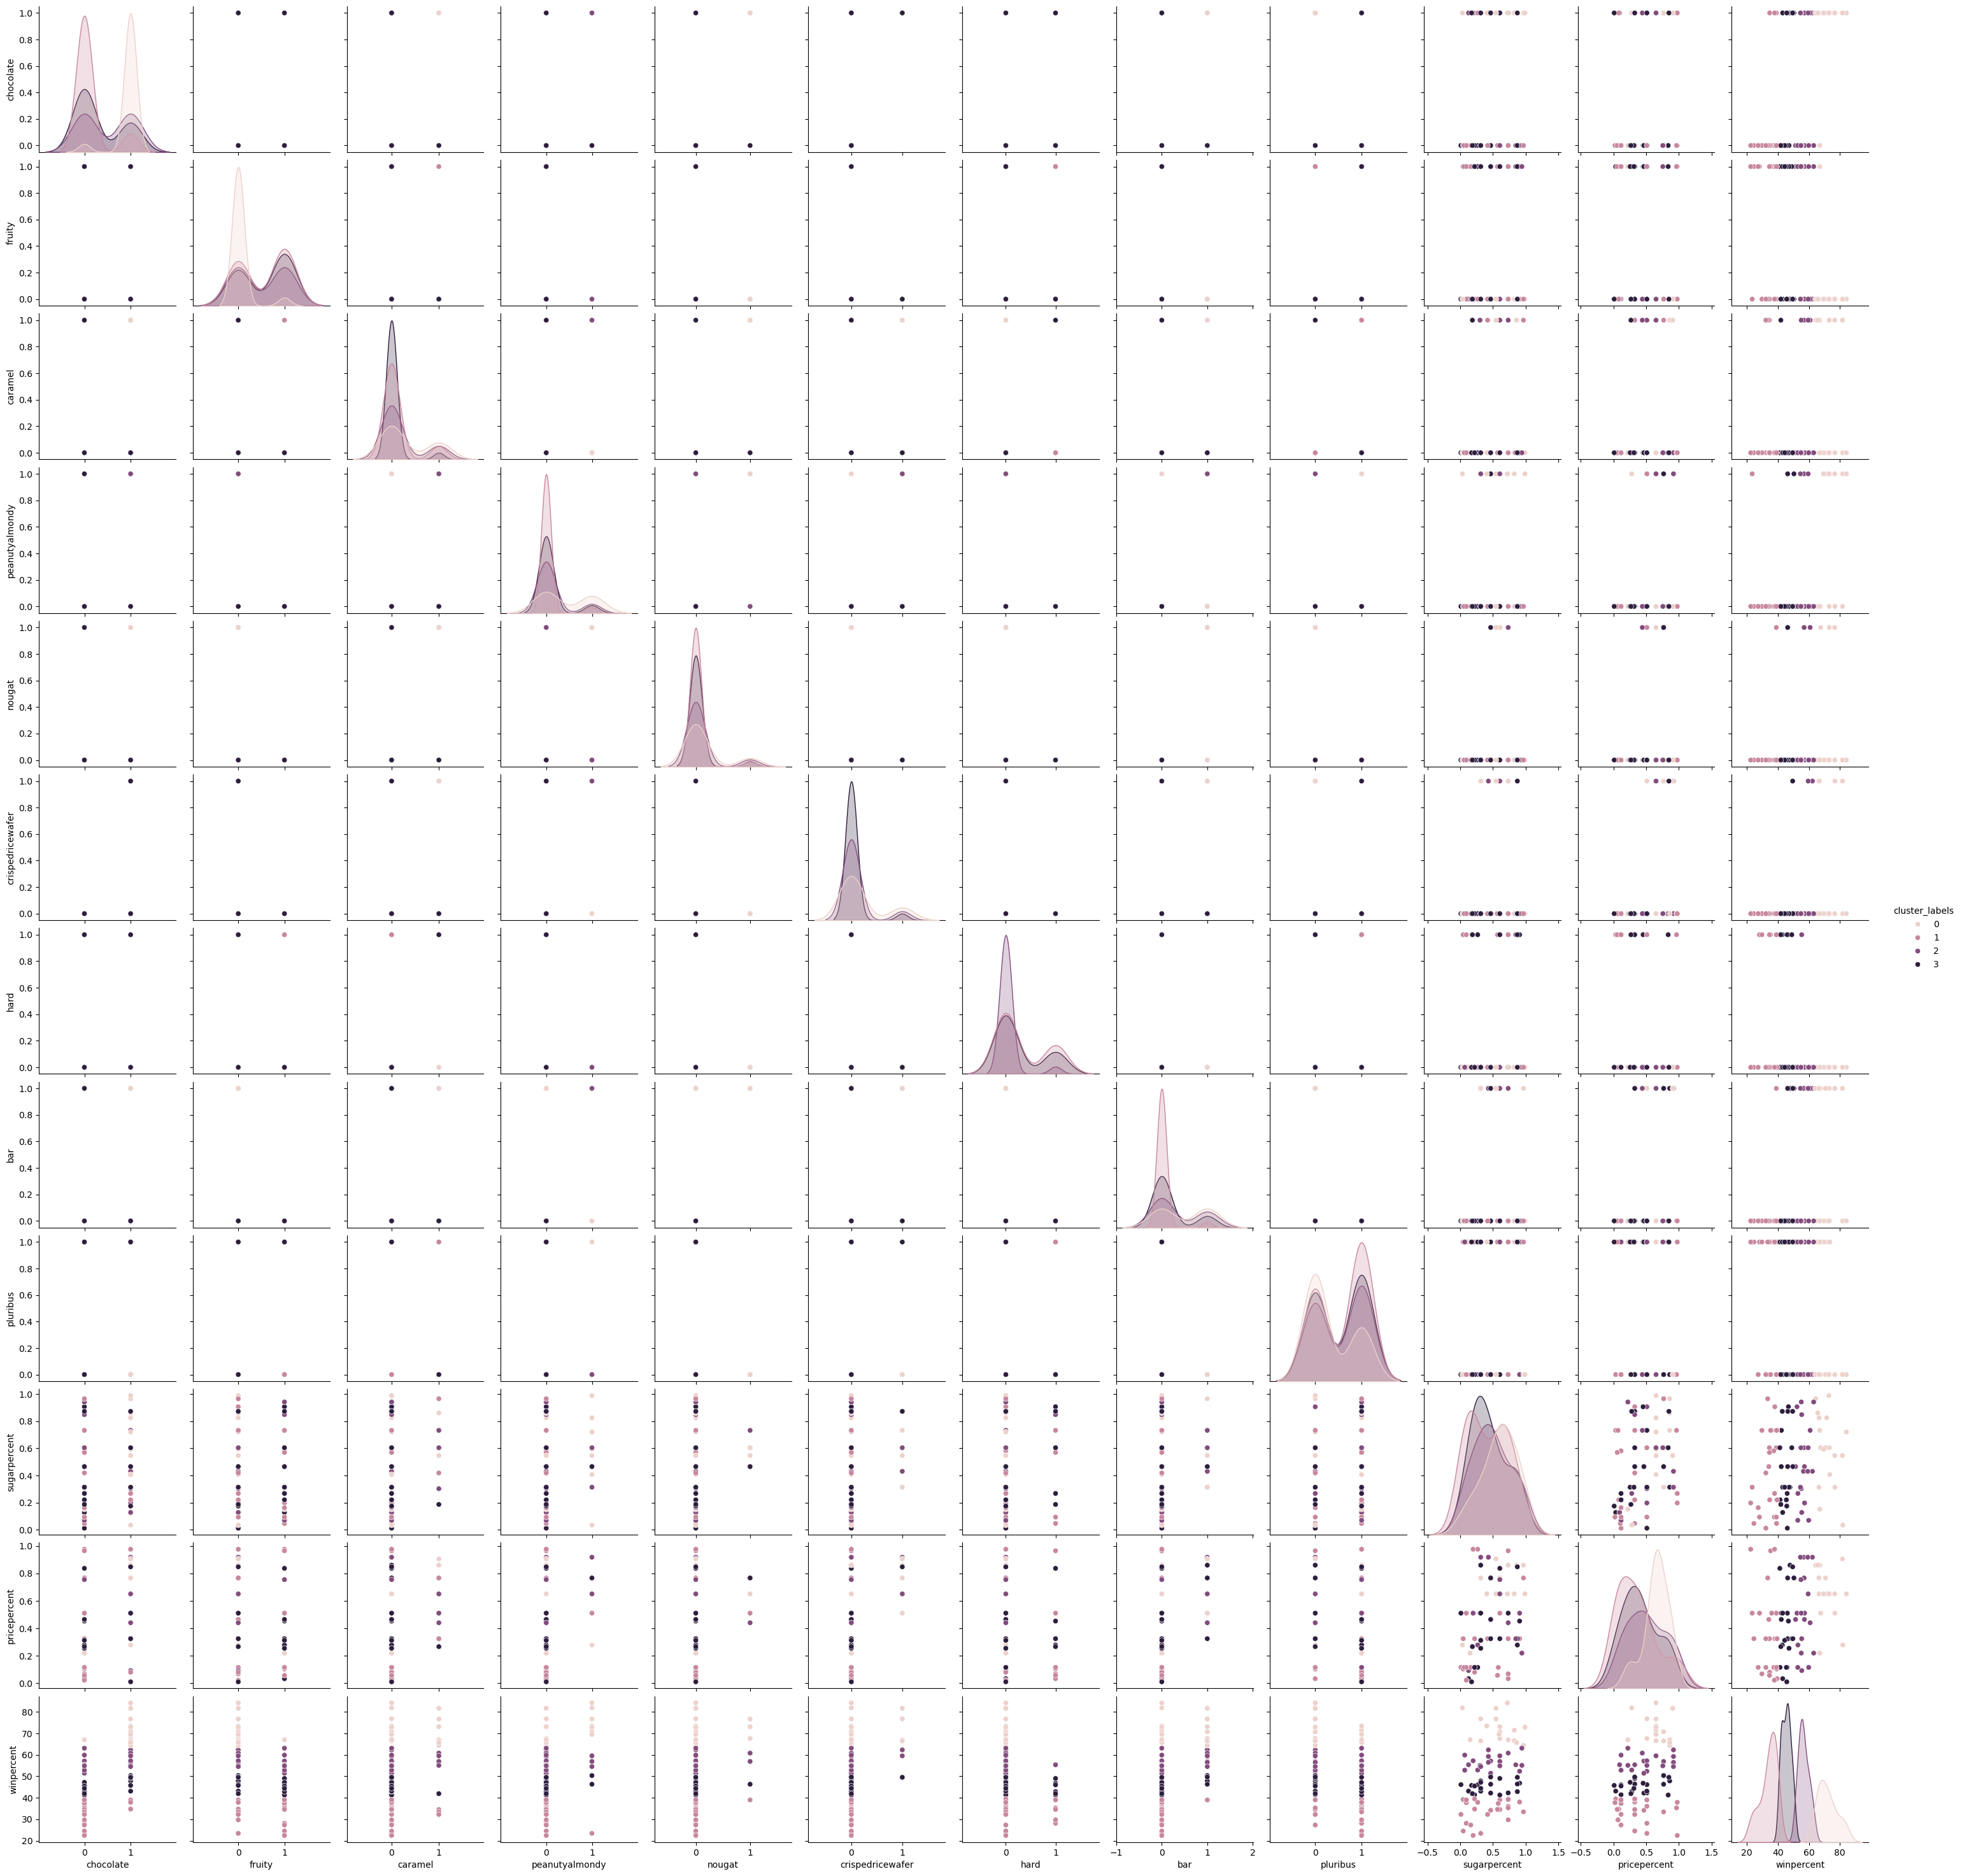

In [7]:
sns.pairplot(data=df, hue="cluster_labels");

### Entrenamiento de Batch K-Means

`MiniBatchKMeans` es una alternativa a `KMeans` que se utiliza especialmente cuando no se tienen los recursos de computo suficientes para entrenar un modelo de `K-Means` tradicional.


La principal diferencia entre éstos modelos, es que el entrenamiento de `MiniBatchKMeans` es más eficiente porque **no** itera sobre el dataset completo para calcular los centroidos, sino que toma mini-lotes (muestra aleatoria de los datos) y sombre éstos actualiza los centroides.


Parámetro adicional:
- `batch-size`: Tamaño que tendra cada lote sobre los cuales calculará el centroide en cada iteración.

Entrenamiento del modelo con los datos previamente estandarizados:

In [8]:
mb_kmeans = MiniBatchKMeans(n_clusters=4, batch_size=8).fit(X)

# Verificamos el total de cluster creados
print(f"Cluster creados: {len(mb_kmeans.cluster_centers_)}")

# Generamos las etiquetas -> como se etiqueraron los grupos
cluster_labels = mb_kmeans.predict(X)
print(cluster_labels)

Cluster creados: 4
[3 3 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 3 0 3 1 0 2 1 1 0 3 3 0 0 3
 3 3 0 0 0 3 3 1 1 0 3 1 1 1 2 2 3 3 1 3 1 0 1 3 0 1 0 2 3 3 0 3 1 1 1 1 0
 0 0 0 0 0 2 0 1 0 1 0]


Ingresamos los nuevos labels al dataset original

In [9]:
df["cluster_labels_mb"] = cluster_labels
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster_labels,cluster_labels_mb
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0,3
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0,3
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,1,1
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,3,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2,0


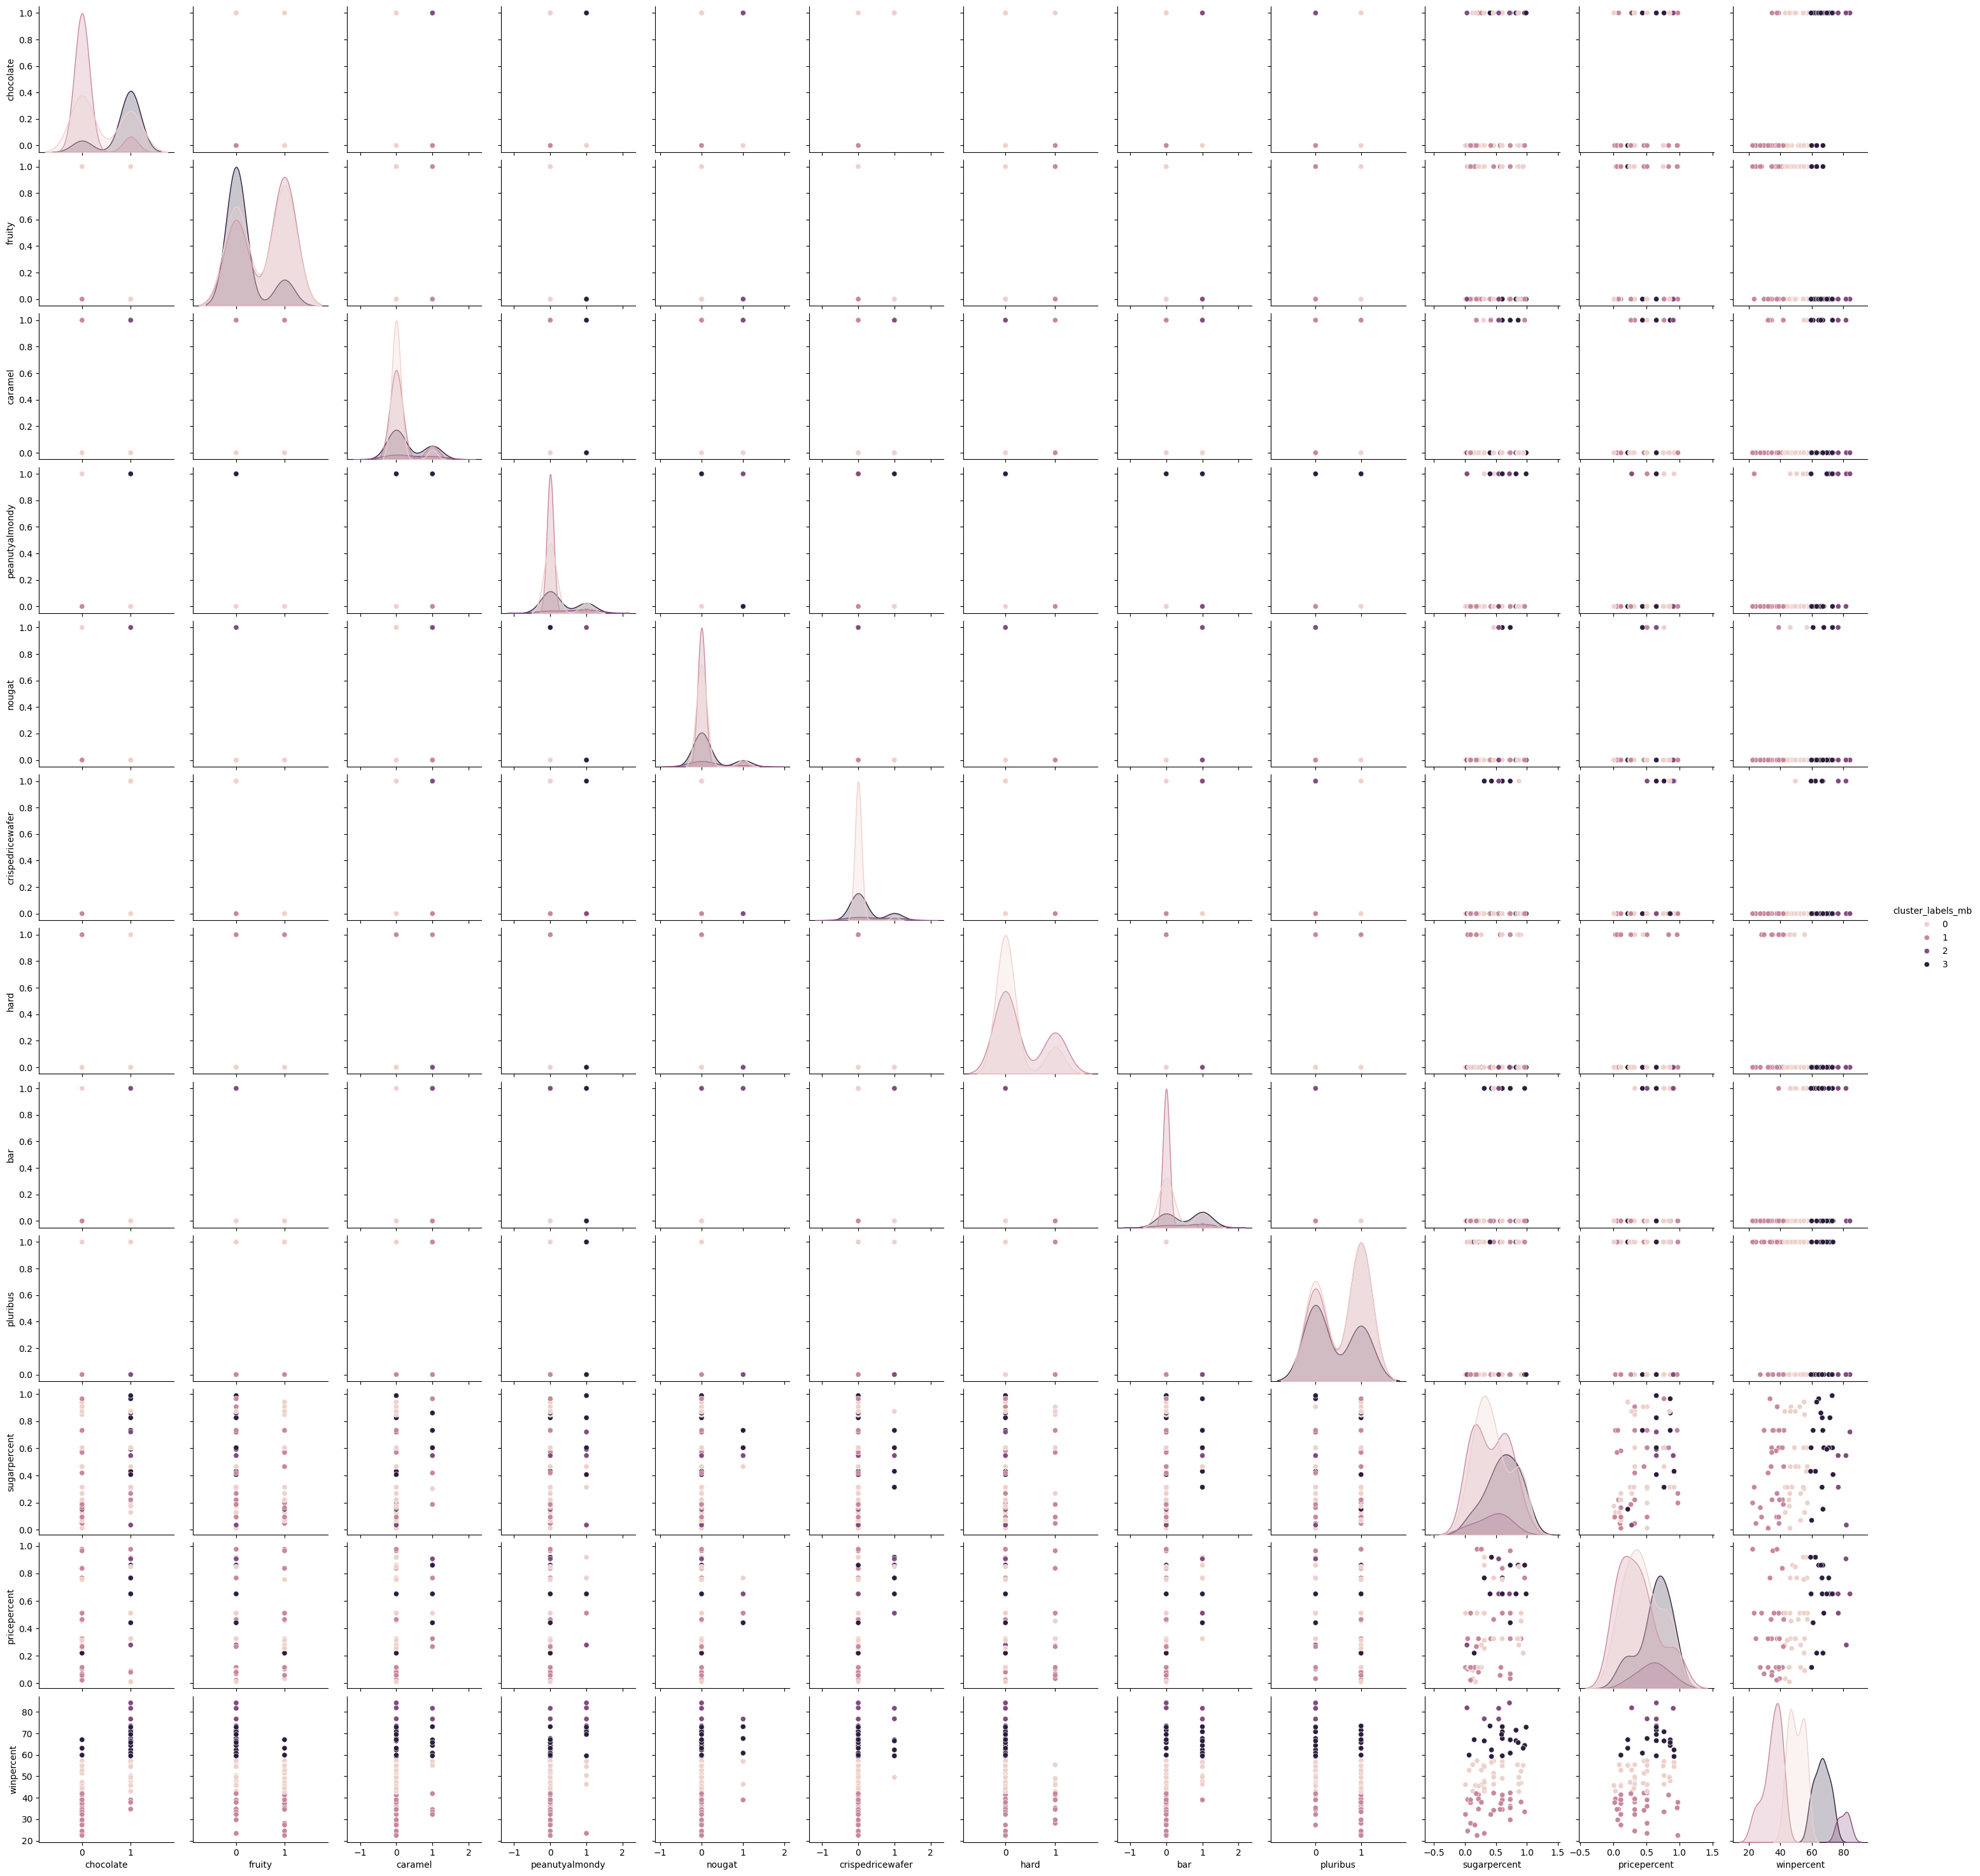

In [10]:
# Visualizamos
sns.pairplot(df.drop(columns=["cluster_labels"], axis=1), hue="cluster_labels_mb");

### Entrenamiento Mean-Shift

In [11]:
mshift = MeanShift().fit(X)

# Total de cluster generados:
print(f"Clusters generados: {len(mshift.cluster_centers_)}")
cluster_labels_ms = mshift.predict(X)
print(cluster_labels_ms)

Clusters generados: 3
[2 2 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 2 1 2 0 1 2 0 0 1 2 2 0 1 2
 2 2 1 1 1 2 2 0 0 0 2 0 0 0 2 2 2 2 0 2 0 0 0 2 1 0 0 2 2 2 1 2 0 0 0 0 1
 1 0 0 1 1 2 0 0 0 0 1]


Añadimos las nuevas etiquetas al dataset original

In [12]:
df["cluster_labels_ms"] = cluster_labels_ms
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster_labels,cluster_labels_mb,cluster_labels_ms
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0,3,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0,3,2
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,1,1,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,3,0,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2,0,1


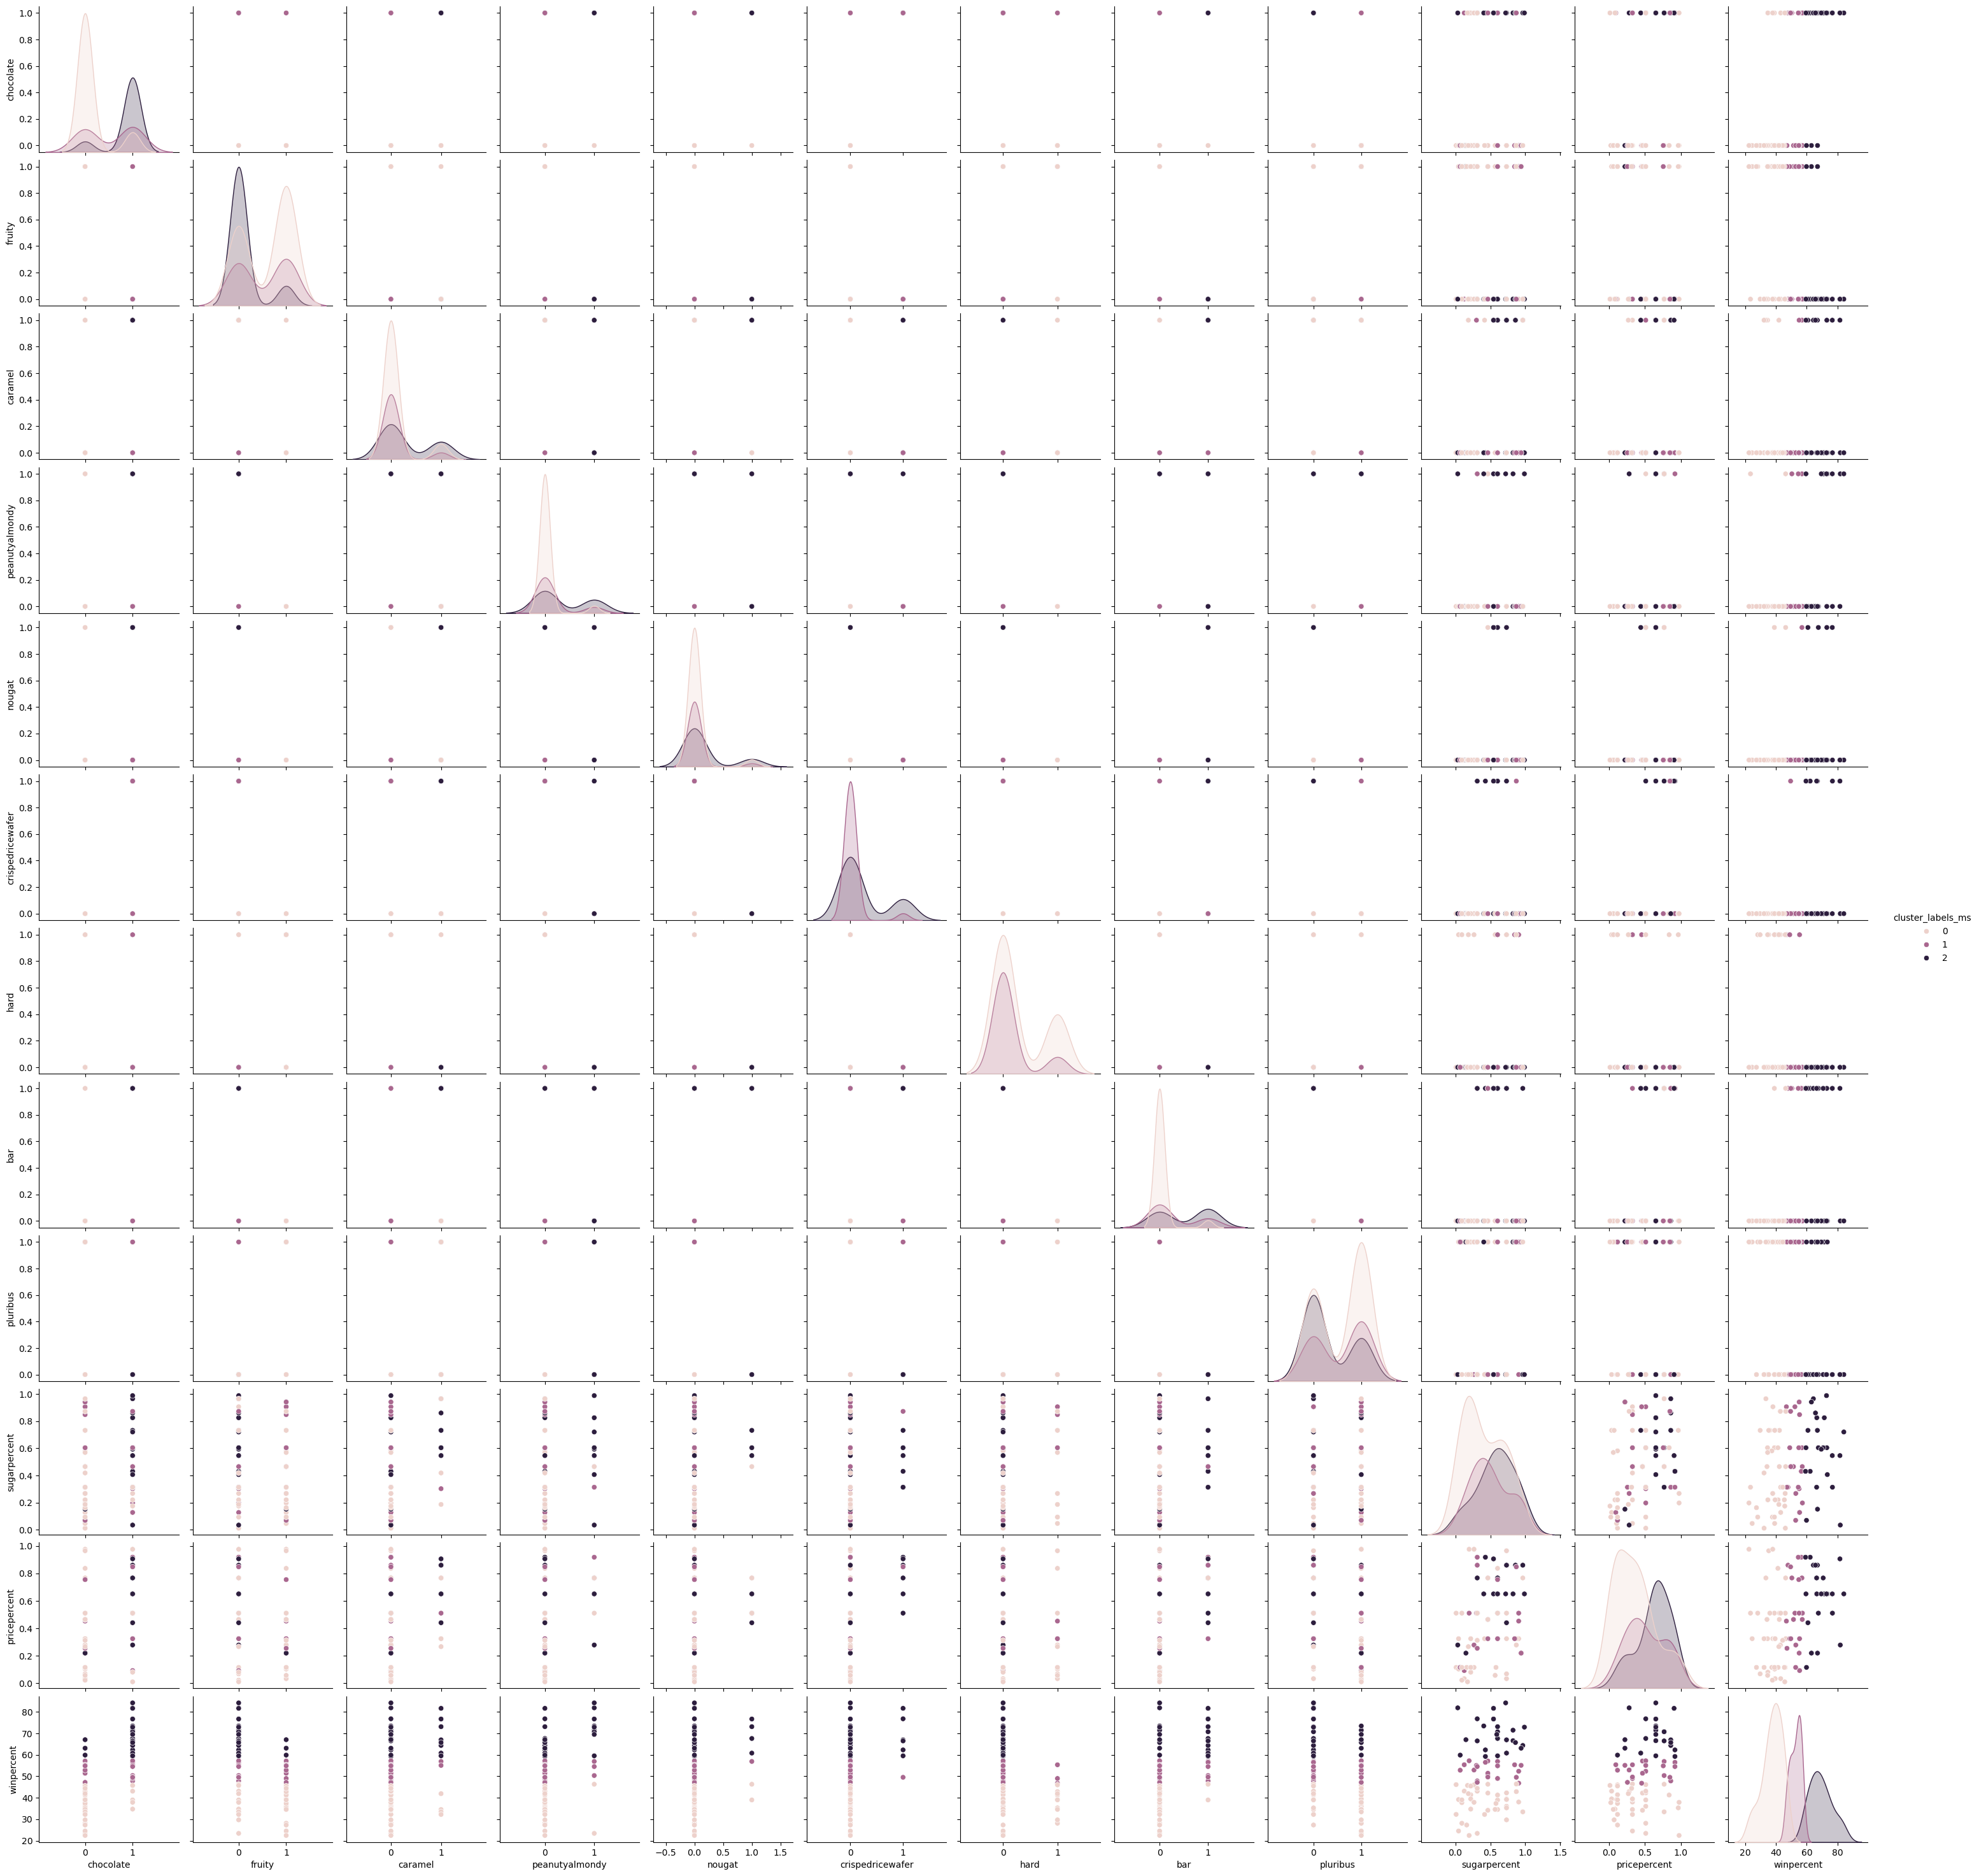

In [13]:
# Visualizamos
sns.pairplot(
	data=df.drop(columns=["cluster_labels", "cluster_labels_mb"], axis=1), hue="cluster_labels_ms"
);